<a href="https://colab.research.google.com/github/RamAngothu/DEEP_LEARNING/blob/main/fake_news_detection_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fake news detection.zip','r')
zip_ref.extractall('/content')
zip_ref.close()
zip_ref.close()

Loading the dataset

In [5]:
import pandas as pd
fake_news = pd.read_csv("/content/Fake.csv")
true_news = pd.read_csv("/content/True.csv")

Creating extra column for label

In [6]:
fake_news['label'] = 0
true_news['label'] = 1

In [7]:
data = pd.concat([fake_news,true_news], axis = 0).reset_index(drop = True)

In [8]:
data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


shuffling the data

In [9]:
from sklearn.utils import shuffle
data = shuffle(data).reset_index(drop = True)

In [10]:
data

,title,text,subject,date,label
0,Democrats Go On The Attack Against Voter ID Laws,Virginia s Voter ID law is being challenged in...,News,"February 22, 2016",0
1,Clinton: 'We respect the choice the people' ma...,WASHINGTON (Reuters) - Democratic presidential...,politicsNews,"June 24, 2016",1
2,Six farmers killed in apparent land dispute in...,LIMA (Reuters) - Six farmers were shot dead in...,worldnews,"September 8, 2017",1
3,"With military discipline imposed, Trump gettin...",WASHINGTON (Reuters) - Donald Trump’s choice o...,politicsNews,"August 4, 2017",1
4,“White people are born into not being human” –...,Ashleigh Shackelford is what passes for a seri...,left-news,"Sep 4, 2017",0
...,...,...,...,...,...
44893,Derby Event Asks Crowd To Stand For Confedera...,It s one thing to have a choice to sit to duri...,News,"September 12, 2016",0
44894,MOTHER OF SON KILLED IN AFGHANISTAN To Anti-Am...,When multi-millionaire San Francisco 49ers qua...,left-news,"Aug 29, 2016",0
44895,WHO NEEDS NANCY PELOSI WHEN CONGRESS HAS PAUL ...,Why do we even need a Congress anymore? We hav...,politics,"Jun 11, 2015",0
44896,Court Documents Show How Trump Cooked The Boo...,Court documents show deceptive behavior by Don...,News,"August 13, 2016",0


In [11]:
data['content'] = data['title'].fillna('') + " " + data['text'].fillna('') # combining the two columns as content

In [12]:
X = data['content']

In [13]:
X

,content
0,Democrats Go On The Attack Against Voter ID L...
1,Clinton: 'We respect the choice the people' ma...
2,Six farmers killed in apparent land dispute in...
3,"With military discipline imposed, Trump gettin..."
4,“White people are born into not being human” –...
...,...
44893,Derby Event Asks Crowd To Stand For Confedera...
44894,MOTHER OF SON KILLED IN AFGHANISTAN To Anti-Am...
44895,WHO NEEDS NANCY PELOSI WHEN CONGRESS HAS PAUL ...
44896,Court Documents Show How Trump Cooked The Boo...


In [14]:
Y = data['label']

In [15]:
X.shape,Y.shape

((44898,), (44898,))

DATA PREPROCESSING

In [16]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

Applying lemmatization over the text data after removing stopwords

In [19]:
corpus = []

for text in X:
  text = text.lower()
  text = re.sub('[^a-zA-Z]',' ',text)
  words = text.split()
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  text = ' '.join(words)
  corpus.append(text)

In [138]:
print(corpus[:5])

['democrat go attack voter id law virginia voter id law challenged court loss conservative majority supreme court might first domino fall signaling end wide spread voter suppression republican reuters virginia law requiring voter show photo identification go trial federal court monday democratic official claiming discriminatory aimed keeping party voter casting ballot defender virginia law say aimed preventing voter fraud trial u district court richmond virginia one several voting right legal battle process democrat republican square ahead november presidential election democratic party virginia two party activist suing virginia state board election want judge henry hudson strike law problem right premise behind law always lie republican became concerned voter fraud became clear white hegemony immediate danger adding problem top way republican attacked people ability vote voter id stand alone law republican might able maintain fiction voter fraud however also cut voting hour number pol

In [21]:
len(corpus),len(Y)

(44898, 44898)

splitting the data

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(corpus, Y, test_size = 0.2, random_state = 42, stratify = Y)

TF-IDF VECTORIZER (converting text into vectors)

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [144]:
# to Display the first 100 items in the vocabulary
print(list(tfidf.vocabulary_.items())[:100])

[('house', np.int64(3880)), ('panel', np.int64(6054)), ('approves', np.int64(466)), ('legislation', np.int64(4771)), ('speed', np.int64(8199)), ('deployment', np.int64(2200)), ('self', np.int64(7771)), ('driving', np.int64(2463)), ('car', np.int64(1162)), ('washington', np.int64(9603)), ('reuters', np.int64(7231)), ('influential', np.int64(4150)), ('committee', np.int64(1559)), ('thursday', np.int64(8824)), ('approved', np.int64(465)), ('revised', np.int64(7283)), ('bipartisan', np.int64(858)), ('bill', np.int64(840)), ('vote', np.int64(9530)), ('would', np.int64(9836)), ('without', np.int64(9785)), ('human', np.int64(3938)), ('control', np.int64(1740)), ('bar', np.int64(697)), ('state', np.int64(8281)), ('blocking', np.int64(903)), ('autonomous', np.int64(627)), ('vehicle', np.int64(9415)), ('allow', np.int64(263)), ('automaker', np.int64(624)), ('obtain', np.int64(5810)), ('exemption', np.int64(2853)), ('deploy', np.int64(2198)), ('meeting', np.int64(5180)), ('existing', np.int64(286

In [105]:
X_train.shape,Y_train.shape

((35918, 10000), (35918,))

MultinomialNB model for sparse data

In [106]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [107]:
model.fit(X_train,Y_train)

MultinomialNB()

Predictions

In [108]:
Y_pred = model.predict(X_test)

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

0.9553452115812917


In [115]:
classification_report(Y_test,Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.96      0.96      4696\n           1       0.95      0.95      0.95      4284\n\n    accuracy                           0.96      8980\n   macro avg       0.96      0.96      0.96      8980\nweighted avg       0.96      0.96      0.96      8980\n'

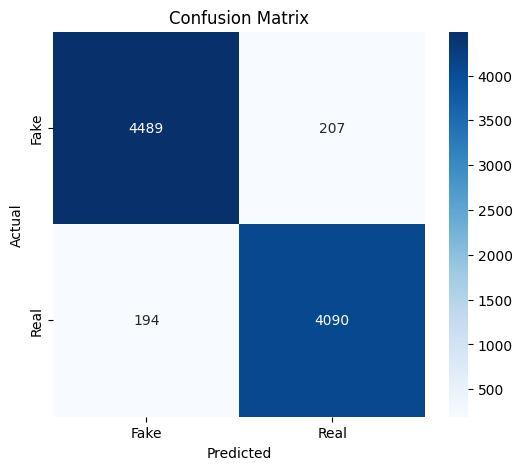

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix = confusion_matrix(Y_test,Y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Taking the news from google and giving it to my model to tell is it fake or not

In [86]:
outside_data = ' Researchers at Harvard University have developed a pill that allows people to sleep only 2 hours a night without any health consequences, according to preliminary reports.'

In [87]:
outside_data_transformed = tfidf.transform([outside_data]).toarray()
outside_data_transformed

array([[0., 0., 0., ..., 0., 0., 0.]])

In [88]:
prediction = model.predict(outside_data_transformed)
if prediction == 0:
  print("Fake News")
else:
  print("True News")

Fake News


In [89]:
outside_data1 = ' The Reserve Bank of India announced today that it will keep interest rates unchanged, citing stable inflation and a positive outlook for economic growth in the coming quarter.'

In [90]:
outside_data1_transformed = tfidf.transform([outside_data1]).toarray()
outside_data1_transformed

array([[0., 0., 0., ..., 0., 0., 0.]])

In [91]:
prediction = model.predict(outside_data1_transformed)
if prediction == 0:
  print("Fake News")
else:
  print("True News")

True News


In [93]:
outside_data2 = ' new study claims that drinking coffee five times a day can reduce the risk of heart disease by 90%, according to unnamed researchers in Europe.'

In [94]:
vectorizer = tfidf.transform([outside_data2]).toarray()
vectorizer

array([[0., 0., 0., ..., 0., 0., 0.]])

In [96]:
prediction = model.predict(vectorizer)
if prediction == 0:
  print("Fake News")
else:
  print("True News")

Fake News
